# Data modelling for Boom Bikes

## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the housing dataset

In [505]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [506]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [507]:
BikeSharing=pd.read_csv(r"C:\Users\amanr\Downloads\Linear regression\day.csv")

In [508]:
# Check the head of the dataset
BikeSharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [509]:
BikeSharing.shape

(730, 16)

In [510]:
BikeSharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [160]:
BikeSharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


<Figure size 2880x1296 with 0 Axes>

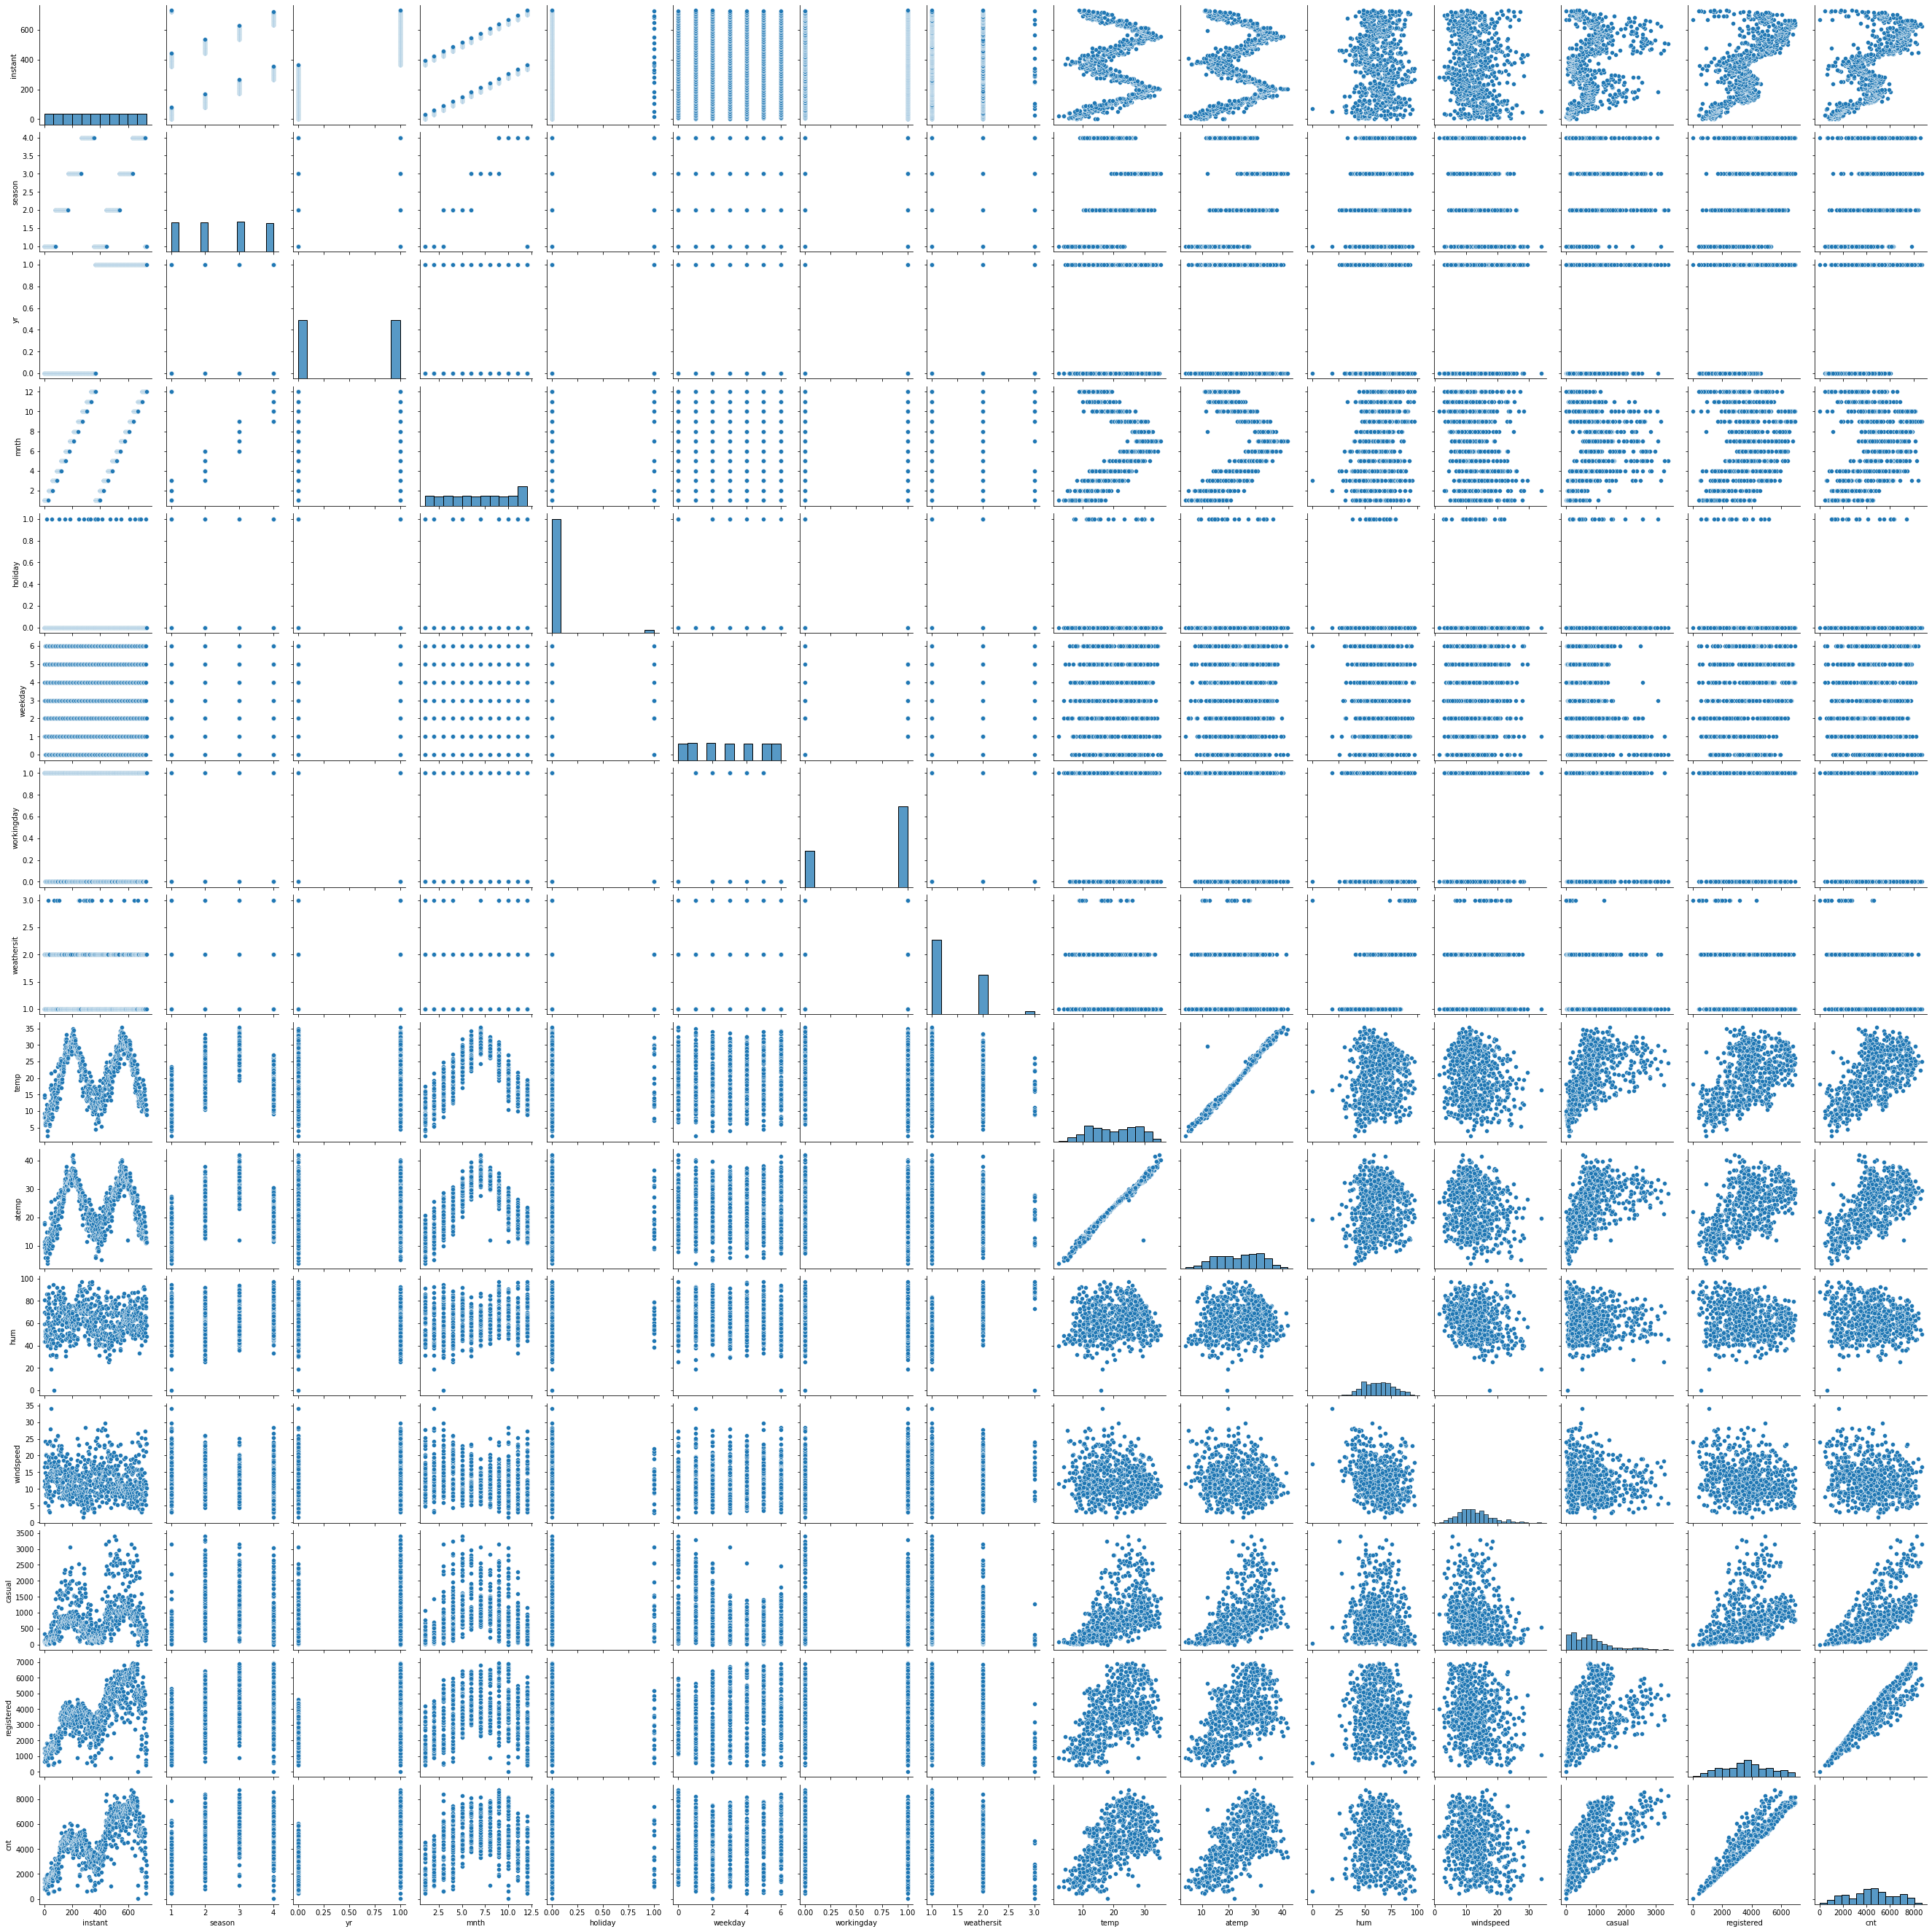

In [513]:
#visualising all variables
plt.figure(figsize=(40, 18))
sns.pairplot(BikeSharing)
plt.show()

<Figure size 2880x1296 with 0 Axes>

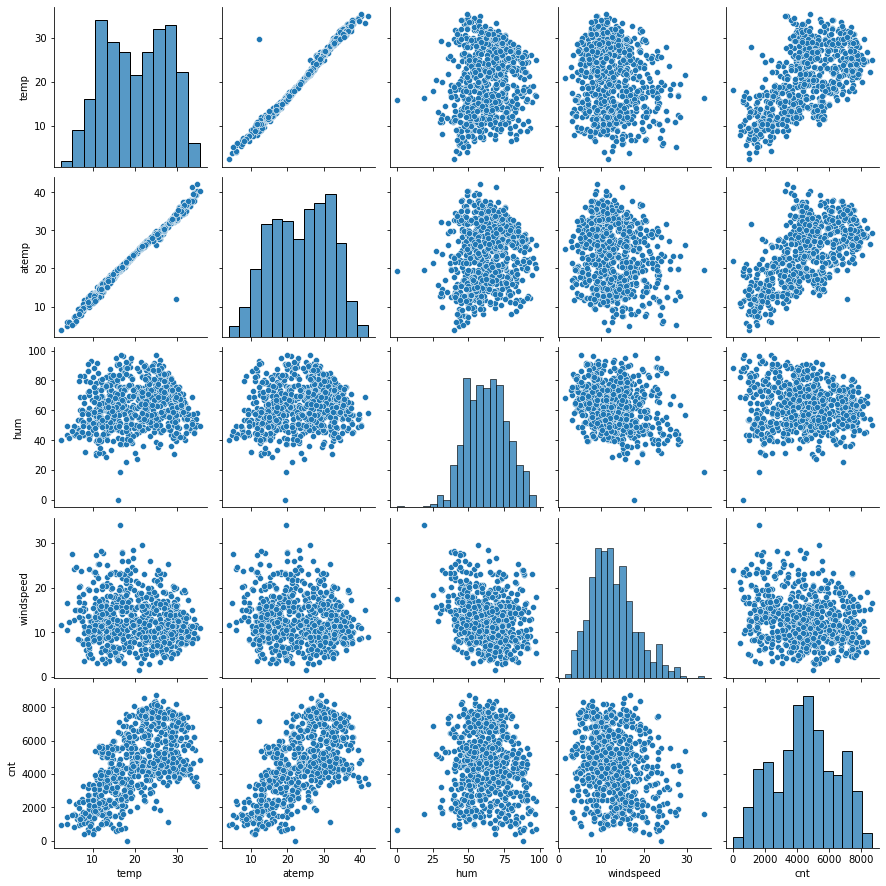

In [515]:
#visualising only numeric variables
plt.figure(figsize=(40, 18))
num_vars= ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
sns.pairplot(BikeSharing[num_vars])
plt.show()
#conculsion - we should go ahead with linear regression because there are some cases where we see a lnear relationship between x and y (e.g, cnt and temp variables)

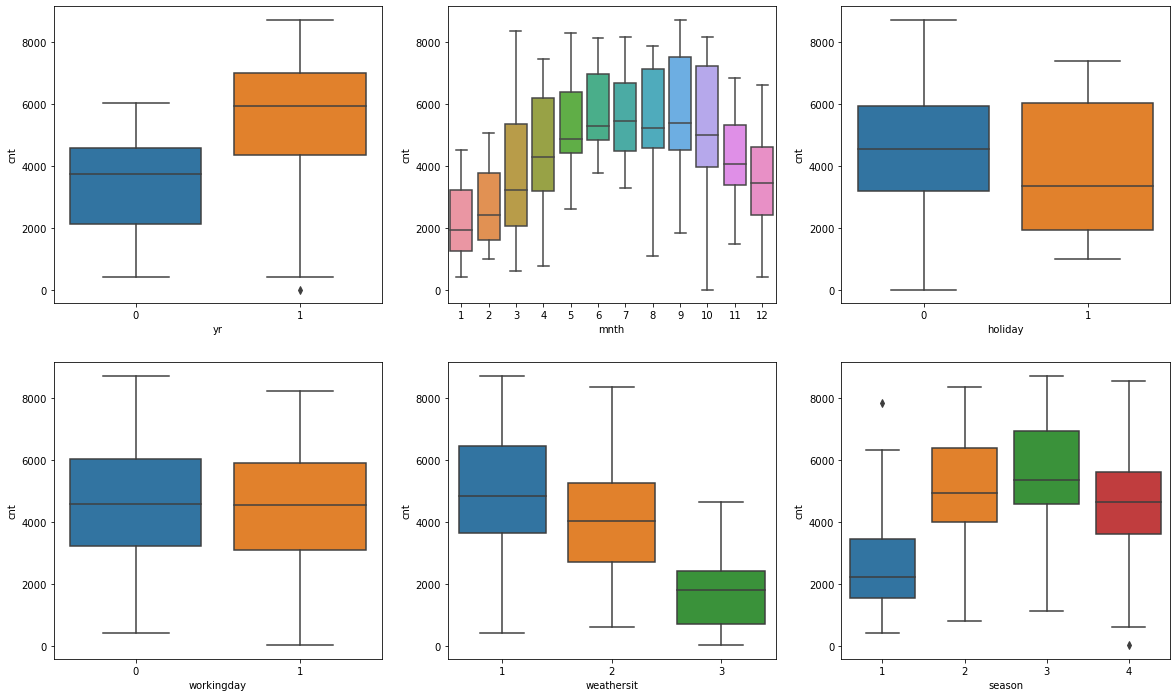

In [162]:
#visaulising the categorical data
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.boxplot(x='yr',y='cnt', data=BikeSharing)
plt.subplot(2,3,2)
sns.boxplot(x='mnth',y='cnt', data=BikeSharing)
plt.subplot(2,3,3)
sns.boxplot(x='holiday',y='cnt', data=BikeSharing)
plt.subplot(2,3,4)
sns.boxplot(x='workingday',y='cnt', data=BikeSharing)
plt.subplot(2,3,5)
sns.boxplot(x='weathersit',y='cnt', data=BikeSharing)
plt.subplot(2,3,6)
sns.boxplot(x='season',y='cnt', data=BikeSharing)
plt.show()

## Step 2: Data Preparation
- Convert categorical variables in numerical:
 
 a. if values are just two (i.e yes or no) then convert them to 1 and 0
 
 b. if more than two responses in one column then use dummy values

In [163]:
BikeSharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [164]:
# remove instant, dteday, casual and registered columns as they are redundant
df1= BikeSharing.drop(['instant','dteday', 'casual', 'registered'],axis=1)
df1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [165]:
# Nominal (type of categrical data) columns: weathersit, season, weekday, mnth - create dummy values for these columns

In [166]:
#create dummy values for weathersit
status = pd.get_dummies(df1['weathersit'])
status.head()

,1,2,3
0,0,1,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0


In [167]:
#rename columns from 1,2,3 to Clear, Misty and Wet(orSnow) respectively
status.columns =['Clear','Misty','Wet(orSnow)']
status

,Clear,Misty,Wet(orSnow)
0,0,1,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
725,0,1,0
726,0,1,0
727,0,1,0
728,1,0,0


###### from the above observation it is clear that type 4( Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog) data is not present in the analysis. Additionally, we don't need three columns: we can drop the `Wet(orSnow)` column, as the type of can be identified with just the first two columns where — 

    - `00` will correspond to `Wet(orSnow)`
    - `01` will correspond to `Misty`
    - `10` will correspond to `Clear`

In [168]:
# Let's drop the last column from status df -
status_dropped = status.drop(['Wet(orSnow)'],axis=1)
status_dropped.head()

,Clear,Misty
0,0,1
1,0,1
2,1,0
3,1,0
4,1,0


In [169]:
#create dummy values for season
status_season = pd.get_dummies(df1['season'])
status_season.value_counts()

1  2  3  4
0  0  1  0    188
   1  0  0    184
1  0  0  0    180
0  0  0  1    178
dtype: int64

###### Similar to weathersit, we don't need four columns: we can drop the first column, as the type of can be identified with just the last three columns where — 

    - `000` will correspond to 1
    - `100` will correspond to 2
    - `010` will correspond to 3
    - `001` will correspond to 4

In [170]:
# Let's drop the last column from status_season df 
status_season_dropped = status_season.drop([1],axis=1)
status_season_dropped.head()

,2,3,4
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [171]:
# renaming column names as per data dictionary
status_season_dropped.columns =['summer','fall','winter']
status_season_dropped.head()
status_season_dropped.value_counts()

summer  fall  winter
0       1     0         188
1       0     0         184
0       0     0         180
              1         178
dtype: int64

In [172]:
#create dummy values for month
status_mnth = pd.get_dummies(df1['mnth'])
status_mnth.head()

,1,2,3,4,5,6,7,8,9,10,11,12
0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0


##### Similar to weathersit, we don't need 12 columns: we can drop the first column, as the type of month can be identified with just the remaining 11 columns where — 

    - `00000000000` will correspond to 1
    - `10000000000` will correspond to 2
    - `01000000000` will correspond to 3
    - `00100000000` will correspond to 4
    - `00010000000` will correspond to 5
    - `00001000000` will correspond to 6
    - `00000100000` will correspond to 7
    - `00000010000` will correspond to 8
    - `00000001000` will correspond to 9
    - `00000000100` will correspond to 10
    - `00000000010` will correspond to 11
    - `00000000001` will correspond to 12

In [173]:
status_mnth_dropped = status_mnth.drop([1],axis=1)
status_mnth_dropped.head()

,2,3,4,5,6,7,8,9,10,11,12
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0


In [174]:
status_mnth_dropped.shape

(730, 11)

In [175]:
status_mnth.shape
#no rows have dropped due to this encoding

(730, 12)

In [176]:
# renaming column names as per data dictionary
status_mnth_dropped.columns =['Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
status_mnth_dropped.head()

,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0


In [177]:
#create dummy values for weekday
status_weekday = pd.get_dummies(df1['weekday'])
status_weekday.head()

,0,1,2,3,4,5,6
0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0


In [178]:
status_weekday.value_counts()

0  1  2  3  4  5  6
0  0  1  0  0  0  0    105
   1  0  0  0  0  0    105
   0  0  0  0  0  1    104
               1  0    104
            1  0  0    104
         1  0  0  0    104
1  0  0  0  0  0  0    104
dtype: int64

###### Similar to above, we don't need 7 columns: we can drop the first column, as the type of weekday can be identified with just the remaining 6 columns where — 

    - `000000` will correspond to 0
    - `100000` will correspond to 1
    - `010000` will correspond to 2
    - `001000` will correspond to 3
    - `000100` will correspond to 4
    - `000010` will correspond to 5
    - `000001` will correspond to 6

In [179]:
status_weekday_dropped = status_weekday.drop([0],axis=1)
status_weekday_dropped.head()


,1,2,3,4,5,6
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,1,0,0,0
3,0,0,0,1,0,0
4,0,0,0,0,1,0


In [180]:
status_weekday_dropped.shape

(730, 6)

In [181]:
#check if 0 corresponds to Sun
df1[df1['weekday']<1]

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
6,1,0,1,0,0,0,2,8.057402,10.44195,49.8696,11.304642,1510
13,1,0,1,0,0,0,1,6.595670,9.42065,53.7826,8.478716,1421
20,1,0,1,0,0,0,1,7.277500,7.89165,45.7083,23.667214,1543
27,1,0,1,0,0,0,2,8.342598,11.16585,79.3043,8.261100,1167
34,1,0,2,0,0,0,2,8.663464,11.42935,58.5217,8.565213,1708
...,...,...,...,...,...,...,...,...,...,...,...,...
699,4,1,12,0,0,0,2,12.231653,15.84520,80.6667,4.000181,5191
706,4,1,12,0,0,0,2,15.648347,19.47540,91.1250,6.792393,5582
713,4,1,12,0,0,0,1,13.290847,16.91915,65.0417,7.125450,5047
720,1,1,12,0,0,0,1,10.899153,11.80565,44.1250,27.292182,1749


In [182]:
#check if 6 corresponds to Sat
df1[df1['weekday']>5]

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
5,1,0,1,0,6,0,1,8.378268,11.66045,51.8261,6.000868,1606
12,1,0,1,0,6,0,1,6.765000,7.54415,47.0417,20.167000,1406
19,1,0,1,0,6,0,2,10.728347,12.75250,53.8333,13.125568,1927
26,1,0,1,0,6,0,1,7.995000,10.98500,68.7500,7.627079,431
33,1,0,2,0,6,0,1,7.665237,8.89390,43.7826,18.609384,1550
...,...,...,...,...,...,...,...,...,...,...,...,...
698,4,1,11,0,6,0,1,12.231653,16.19335,64.9583,3.917544,5668
705,4,1,12,0,6,0,2,13.154153,16.09790,76.4167,8.750200,5008
712,4,1,12,0,6,0,1,11.548347,14.70960,64.2917,8.792343,5611
719,1,1,12,0,6,0,2,13.393347,15.08835,55.6667,25.083661,3623


In [183]:
#since 0 corresponds to Sun and 1 corresponds to Mon, we are renaming the column names for convenience
status_weekday_dropped.columns =['Mon','Tues','Wed','Thu','Fri','Sat']
status_weekday_dropped.head()

,Mon,Tues,Wed,Thu,Fri,Sat
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,1,0,0,0
3,0,0,0,1,0,0
4,0,0,0,0,1,0


In [184]:
# Add the results to the original main dataframe - df1 - weekday 

df1 = pd.concat([df1,status_weekday_dropped], axis = 1)
df1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,Mon,Tues,Wed,Thu,Fri,Sat
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801,0,1,0,0,0,0
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,1,0,0,0
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,1,0,0
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,0,1,0


In [185]:
# Add the results to the original main dataframe - df1 - mnth
df1 = pd.concat([df1,status_mnth_dropped], axis = 1)
df1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,0,0,0,0
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,0


In [186]:
# Add the results to the original main dataframe - df1 - season
df1 = pd.concat([df1,status_season_dropped], axis = 1)
df1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Jun,Jul,Aug,Sep,Oct,Nov,Dec,summer,fall,winter
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,0,0,0,0
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,0


In [187]:
# Add the results to the original main dataframe - df1 - weathersit
df1 = pd.concat([df1,status_dropped], axis = 1)
df1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Aug,Sep,Oct,Nov,Dec,summer,fall,winter,Clear,Misty
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,...,0,0,0,0,0,0,0,0,0,1
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,0,0,0,1
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,0,1,0
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,0,0,1,0
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,1,0


In [188]:
# Drop columns: weathersit, season, weekday, mnth as we have created the dummies for it

df1.drop(['weathersit', 'season', 'weekday', 'mnth'], axis = 1, inplace = True)

In [189]:
df1.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Mon,Tues,...,Aug,Sep,Oct,Nov,Dec,summer,fall,winter,Clear,Misty
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,0,1,...,0,0,0,0,0,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,0,0,1,0


#### create train and test split

In [466]:
df_train, df_test=train_test_split(df1,train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


### Rescaling of numerical variables - incl Target variable ('cnt')

Methodology used: Normalization or min-max scaling

In [467]:
df1.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Mon,Tues,...,Aug,Sep,Oct,Nov,Dec,summer,fall,winter,Clear,Misty
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,0,1,...,0,0,0,0,0,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,0,0,1,0


In [468]:
# 1. instantiate an object
scaler= MinMaxScaler()

# create a list of numeric vars
num_vars= ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

# 2. Fit on data
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Mon,Tues,...,Aug,Sep,Oct,Nov,Dec,summer,fall,winter,Clear,Misty
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,1,0,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,0,0,0,0,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,1,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,0,0,0,0,0,1,0,0,0,1
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,...,0,0,0,0,0,1,0,0,0,1


In [469]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Mon,Tues,...,Aug,Sep,Oct,Nov,Dec,summer,fall,winter,Clear,Misty
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.513156,0.650480,0.320883,0.513499,0.154902,0.152941,...,0.096078,0.080392,0.084314,0.086275,0.084314,0.247059,0.262745,0.247059,0.625490,0.345098
std,0.500429,0.157763,0.453386,0.225858,0.212410,0.145846,0.169803,0.224421,0.362166,0.360284,...,0.294988,0.272166,0.278131,0.281045,0.278131,0.431725,0.440557,0.431725,0.484471,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Step 3 - Training the model

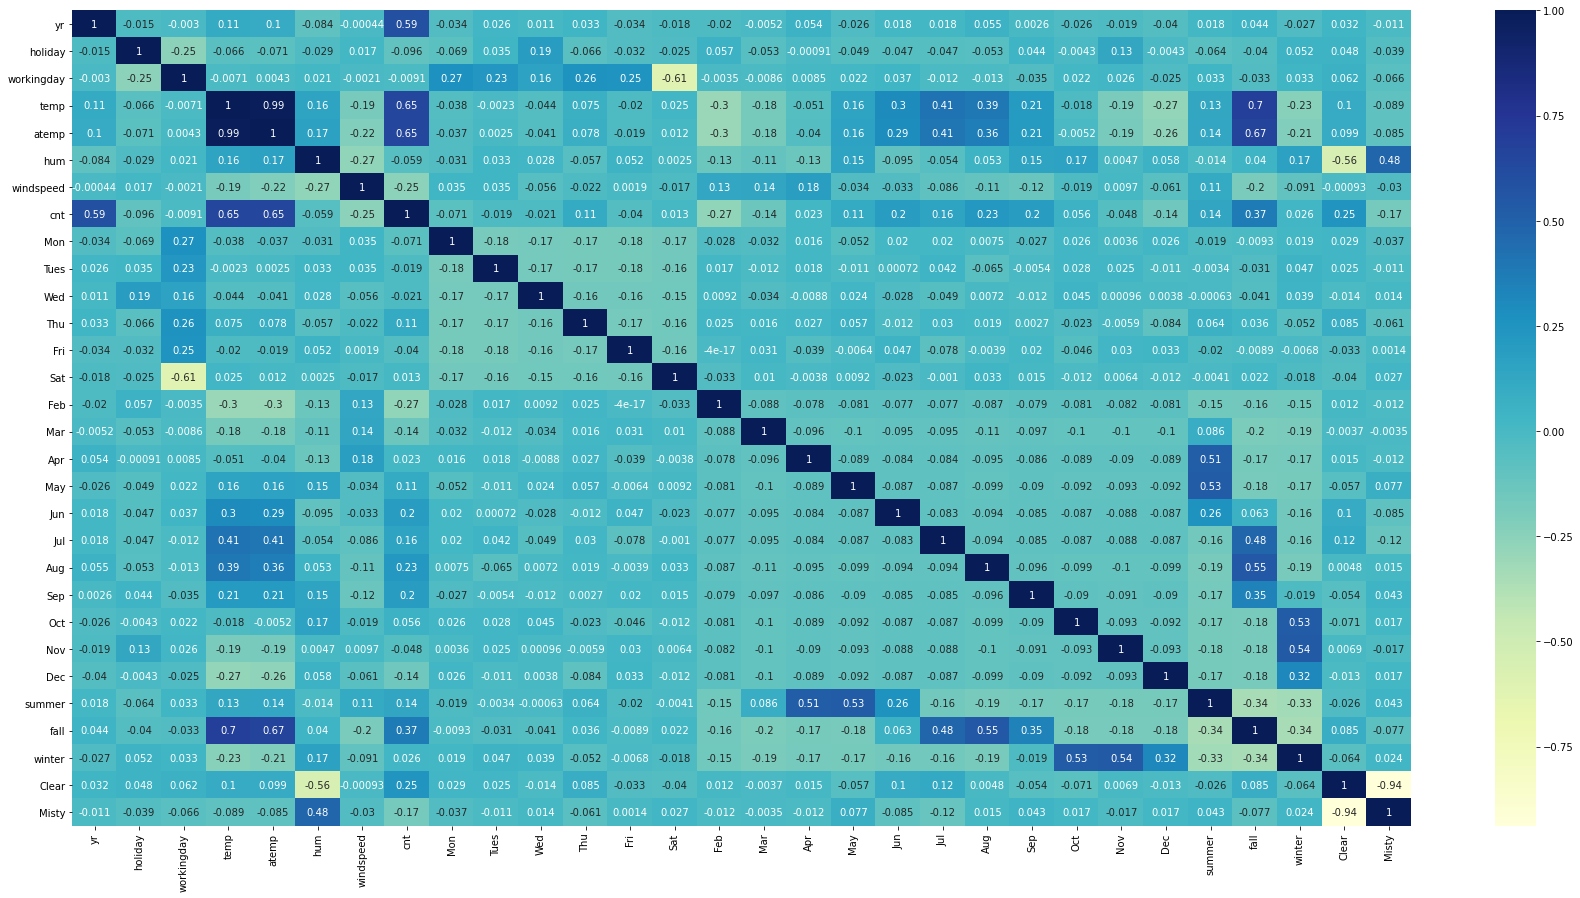

In [470]:
#heatmap to see whih variable has the highest correlation
plt.figure(figsize=(30,15))
sns.heatmap(df_train.corr(),annot=True,cmap="YlGnBu")
plt.show()

### Methodology used- apply all variables and then remove variables one by one

In [471]:
# defining X and y variables
y_train= df_train.pop('cnt')
X_train= df_train

In [472]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 576 to 520
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          510 non-null    int64  
 1   holiday     510 non-null    int64  
 2   workingday  510 non-null    int64  
 3   temp        510 non-null    float64
 4   atemp       510 non-null    float64
 5   hum         510 non-null    float64
 6   windspeed   510 non-null    float64
 7   Mon         510 non-null    uint8  
 8   Tues        510 non-null    uint8  
 9   Wed         510 non-null    uint8  
 10  Thu         510 non-null    uint8  
 11  Fri         510 non-null    uint8  
 12  Sat         510 non-null    uint8  
 13  Feb         510 non-null    uint8  
 14  Mar         510 non-null    uint8  
 15  Apr         510 non-null    uint8  
 16  May         510 non-null    uint8  
 17  Jun         510 non-null    uint8  
 18  Jul         510 non-null    uint8  
 19  Aug         510 non-null   

In [473]:
#add constant to dependent variables

X_train_sm=sm.add_constant(X_train)

#create model
lr=sm.OLS(y_train, X_train_sm)

#fit
lr_model=lr.fit()

#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     93.97
Date:                Wed, 10 Nov 2021   Prob (F-statistic):          1.24e-177
Time:                        09:10:05   Log-Likelihood:                 523.07
No. Observations:                 510   AIC:                            -986.1
Df Residuals:                     480   BIC:                            -859.1
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0125      0.045     -0.276      0.783      -0.102       0.077
yr             0.2312      0.008     28.360      0.000       0.215       0.247
holiday       -0.1345      0.066     -2.054      0.041      -0.263      -0.006
workingday    -0.0605      0.071     -0.849      0.396      -0.200       0.079
temp           0.3873      0.143      2.699      0.007       0.105       0.669
atemp          0.0547      0.139      0.392      0.695      -0.219       0.329
hum           -0.1579      0.039     -4.050      0.000      -0.234      -0.081
windspeed     -0.1802      0.027     -6.751      0.000      -0.233      -0.128
Mon            0.0252      0.072      0.352      0.725      -0.116       0.166
Tues           0.0238      0.071      0.333      0.739      -0.116       0.164
Wed            0.0396      0.071      0.560      0.576      -0.100       0.179
Thu            0.0541      0.072      0.753      0.452      -0.087       0.195
Fri            0.0499      0.072      0.696      0.487      -0.091       0.191
Sat           -0.0058      0.015     -0.378      0.706      -0.036       0.025
Feb            0.0267      0.021      1.283      0.200      -0.014       0.068
Mar            0.0650      0.023      2.878      0.004       0.021       0.109
Apr            0.0640      0.034      1.887      0.060      -0.003       0.131
May            0.0896      0.037      2.449      0.015       0.018       0.161
Jun            0.0737      0.039      1.874      0.062      -0.004       0.151
Jul            0.0366      0.044      0.824      0.410      -0.051       0.124
Aug            0.0931      0.042      2.197      0.029       0.010       0.176
Sep            0.1556      0.038      4.117      0.000       0.081       0.230
Oct            0.0698      0.035      2.002      0.046       0.001       0.138
Nov            0.0245      0.033      0.736      0.462      -0.041       0.090
Dec            0.0196      0.027      0.731      0.465      -0.033       0.072
summer         0.0867      0.024      3.632      0.000       0.040       0.134
fall           0.0409      0.030      1.349      0.178      -0.019       0.100
winter         0.1530      0.026      5.823      0.000       0.101       0.205
Clear          0.2492      0.027      9.324      0.000       0.197       0.302
Misty          0.1914      0.025      7.569      0.000       0.142       0.241
==============================================================================
Omnibus:                       78.724   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              207.783
Skew:                          -0.768   Prob(JB):                     7.59e-46
Kurtosis:                       5.724   Cond. No.                         98.2
==============================================================================

N

#### calc VIFs to identify multiollinearity of variables

In [474]:
vif=pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF']=[variance_inflation_factor (X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
3,temp,445.90
4,atemp,382.12
2,workingday,229.90
7,Mon,50.79
8,Tues,49.63
11,Fri,48.17
10,Thu,47.11
9,Wed,43.27
5,hum,22.54
25,fall,15.34


### 4 Situations to help determine which variables to keep and remove

    -  high VIF(>5), high p-value: remove
    -  low VIF(<5), low p-value: keep
    -  high VIF(>5), low p-value: remove after step#4
    -  low VIF(>5), high p-value: remove this before step#3 and then again check VIF and see if has reduced

In [475]:
# will remove multiple columns, where p value is greater than 0.05 -

X = X_train.drop(['workingday','atemp','Mon','Tues','Wed','Thu','Fri','Sat','Feb','Jul','Apr','Jun','Nov','Dec','fall'],axis=1)

In [476]:
#re-run the model and check statistics
X_train_sm=sm.add_constant(X)

#create model
lr=sm.OLS(y_train, X_train_sm)

#fit
lr_model=lr.fit()

#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.9
Date:                Wed, 10 Nov 2021   Prob (F-statistic):          3.87e-189
Time:                        09:10:05   Log-Likelihood:                 512.21
No. Observations:                 510   AIC:                            -994.4
Df Residuals:                     495   BIC:                            -930.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0010      0.043     -0.024      0.981      -0.086       0.084
yr             0.2291      0.008     28.334      0.000       0.213       0.245
holiday       -0.0910      0.026     -3.566      0.000      -0.141      -0.041
temp           0.5352      0.023     23.728      0.000       0.491       0.580
hum           -0.1879      0.038     -4.975      0.000      -0.262      -0.114
windspeed     -0.1883      0.026     -7.349      0.000      -0.239      -0.138
Mar            0.0261      0.014      1.819      0.069      -0.002       0.054
May            0.0224      0.018      1.274      0.203      -0.012       0.057
Aug            0.0623      0.016      3.795      0.000       0.030       0.094
Sep            0.1309      0.016      7.978      0.000       0.099       0.163
Oct            0.0361      0.017      2.068      0.039       0.002       0.070
summer         0.0989      0.012      8.113      0.000       0.075       0.123
winter         0.1400      0.012     11.357      0.000       0.116       0.164
Clear          0.2378      0.026      9.020      0.000       0.186       0.290
Misty          0.1849      0.025      7.376      0.000       0.136       0.234
==============================================================================
Omnibus:                       64.808   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              146.941
Skew:                          -0.685   Prob(JB):                     1.24e-32
Kurtosis:                       5.245   Cond. No.                         25.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [477]:
#re-calc VIF for multicollienarity
vif=pd.DataFrame()
vif['Features'] = X.columns
vif['VIF']=[variance_inflation_factor (X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
3,hum,18.21
2,temp,10.72
12,Clear,10.12
13,Misty,7.51
4,windspeed,4.26
11,winter,2.36
10,summer,2.31
0,yr,2.07
6,May,1.62
7,Aug,1.62


In [478]:
#drop May column as p value is >0.05
X = X.drop(['May'],axis=1)

In [479]:
X.columns

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'Mar', 'Aug', 'Sep', 'Oct',
       'summer', 'winter', 'Clear', 'Misty'],
      dtype='object')

In [480]:
#re-run the model and check statistics
X_train_sm=sm.add_constant(X)

#create model
lr=sm.OLS(y_train, X_train_sm)

#fit
lr_model=lr.fit()

#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.2
Date:                Wed, 10 Nov 2021   Prob (F-statistic):          5.94e-190
Time:                        09:10:05   Log-Likelihood:                 511.38
No. Observations:                 510   AIC:                            -994.8
Df Residuals:                     496   BIC:                            -935.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0075      0.043     -0.174      0.862      -0.092       0.077
yr             0.2287      0.008     28.289      0.000       0.213       0.245
holiday       -0.0917      0.026     -3.591      0.000      -0.142      -0.042
temp           0.5371      0.023     23.855      0.000       0.493       0.581
hum           -0.1806      0.037     -4.835      0.000      -0.254      -0.107
windspeed     -0.1893      0.026     -7.388      0.000      -0.240      -0.139
Mar            0.0233      0.014      1.642      0.101      -0.005       0.051
Aug            0.0605      0.016      3.699      0.000       0.028       0.093
Sep            0.1292      0.016      7.897      0.000       0.097       0.161
Oct            0.0355      0.017      2.032      0.043       0.001       0.070
summer         0.1059      0.011      9.743      0.000       0.085       0.127
winter         0.1393      0.012     11.304      0.000       0.115       0.163
Clear          0.2401      0.026      9.123      0.000       0.188       0.292
Misty          0.1869      0.025      7.465      0.000       0.138       0.236
==============================================================================
Omnibus:                       63.998   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              139.779
Skew:                          -0.689   Prob(JB):                     4.44e-31
Kurtosis:                       5.163   Cond. No.                         24.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [481]:
#re-calc VIF for multicollienarity
vif=pd.DataFrame()
vif['Features'] = X.columns
vif['VIF']=[variance_inflation_factor (X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
3,hum,18.03
2,temp,10.69
11,Clear,10.11
12,Misty,7.51
4,windspeed,4.22
10,winter,2.35
0,yr,2.06
9,summer,1.83
8,Oct,1.62
6,Aug,1.61


In [482]:
#drop Mar column as p value is >0.05
X = X.drop(['Mar'],axis=1)

In [483]:
#re-run the model and check statistics
X_train_sm=sm.add_constant(X)

#create model
lr=sm.OLS(y_train, X_train_sm)

#fit
lr_model=lr.fit()

#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     221.3
Date:                Wed, 10 Nov 2021   Prob (F-statistic):          1.49e-190
Time:                        09:10:05   Log-Likelihood:                 510.00
No. Observations:                 510   AIC:                            -994.0
Df Residuals:                     497   BIC:                            -938.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0006      0.043      0.013      0.990      -0.083       0.085
yr             0.2289      0.008     28.264      0.000       0.213       0.245
holiday       -0.0941      0.026     -3.685      0.000      -0.144      -0.044
temp           0.5316      0.022     23.836      0.000       0.488       0.575
hum           -0.1818      0.037     -4.861      0.000      -0.255      -0.108
windspeed     -0.1868      0.026     -7.291      0.000      -0.237      -0.136
Aug            0.0585      0.016      3.583      0.000       0.026       0.091
Sep            0.1277      0.016      7.803      0.000       0.096       0.160
Oct            0.0358      0.018      2.046      0.041       0.001       0.070
summer         0.1058      0.011      9.719      0.000       0.084       0.127
winter         0.1353      0.012     11.180      0.000       0.112       0.159
Clear          0.2385      0.026      9.052      0.000       0.187       0.290
Misty          0.1854      0.025      7.397      0.000       0.136       0.235
==============================================================================
Omnibus:                       63.666   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              147.543
Skew:                          -0.666   Prob(JB):                     9.15e-33
Kurtosis:                       5.273   Cond. No.                         24.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [484]:
#re-calc VIF for multicollienarity
vif=pd.DataFrame()
vif['Features'] = X.columns
vif['VIF']=[variance_inflation_factor (X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
3,hum,17.88
2,temp,10.48
10,Clear,10.03
11,Misty,7.49
4,windspeed,4.15
9,winter,2.26
0,yr,2.06
8,summer,1.83
7,Oct,1.62
5,Aug,1.60


In [485]:
#dropping 'hum' as VIF is quite high
X = X.drop(['hum'],axis=1)

In [486]:
#re-run the model and check statistics
X_train_sm=sm.add_constant(X)

#create model
lr=sm.OLS(y_train, X_train_sm)

#fit
lr_model=lr.fit()

#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     228.9
Date:                Wed, 10 Nov 2021   Prob (F-statistic):          9.45e-187
Time:                        09:10:05   Log-Likelihood:                 498.15
No. Observations:                 510   AIC:                            -972.3
Df Residuals:                     498   BIC:                            -921.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1524      0.030     -5.148      0.000      -0.211      -0.094
yr             0.2329      0.008     28.281      0.000       0.217       0.249
holiday       -0.0956      0.026     -3.660      0.000      -0.147      -0.044
temp           0.5099      0.022     22.823      0.000       0.466       0.554
windspeed     -0.1517      0.025     -6.035      0.000      -0.201      -0.102
Aug            0.0569      0.017      3.406      0.001       0.024       0.090
Sep            0.1208      0.017      7.245      0.000       0.088       0.154
Oct            0.0311      0.018      1.741      0.082      -0.004       0.066
summer         0.1026      0.011      9.237      0.000       0.081       0.124
winter         0.1266      0.012     10.345      0.000       0.103       0.151
Clear          0.2869      0.025     11.510      0.000       0.238       0.336
Misty          0.2050      0.025      8.106      0.000       0.155       0.255
==============================================================================
Omnibus:                       61.862   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              141.356
Skew:                          -0.653   Prob(JB):                     2.02e-31
Kurtosis:                       5.224   Cond. No.                         16.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [488]:
#re-calc VIF for multicollienarity
vif=pd.DataFrame()
vif['Features'] = X.columns
vif['VIF']=[variance_inflation_factor (X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
2,temp,8.70
9,Clear,7.50
10,Misty,4.22
3,windspeed,4.09
8,winter,2.09
0,yr,2.06
7,summer,1.83
6,Oct,1.61
4,Aug,1.60
5,Sep,1.34


In [489]:
#drop Oct column as p value is >0.05
X = X.drop(['Oct'],axis=1)

In [490]:
#re-run the model and check statistics
X_train_sm=sm.add_constant(X)

#create model
lr=sm.OLS(y_train, X_train_sm)

#fit
lr_model=lr.fit()

#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     250.5
Date:                Wed, 10 Nov 2021   Prob (F-statistic):          2.62e-187
Time:                        09:10:32   Log-Likelihood:                 496.61
No. Observations:                 510   AIC:                            -971.2
Df Residuals:                     499   BIC:                            -924.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1511      0.030     -5.097      0.000      -0.209      -0.093
yr             0.2326      0.008     28.191      0.000       0.216       0.249
holiday       -0.0966      0.026     -3.692      0.000      -0.148      -0.045
temp           0.5173      0.022     23.546      0.000       0.474       0.561
windspeed     -0.1497      0.025     -5.950      0.000      -0.199      -0.100
Aug            0.0541      0.017      3.249      0.001       0.021       0.087
Sep            0.1163      0.017      7.046      0.000       0.084       0.149
summer         0.1012      0.011      9.116      0.000       0.079       0.123
winter         0.1371      0.011     12.843      0.000       0.116       0.158
Clear          0.2819      0.025     11.361      0.000       0.233       0.331
Misty          0.2007      0.025      7.959      0.000       0.151       0.250
==============================================================================
Omnibus:                       55.243   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              119.255
Skew:                          -0.606   Prob(JB):                     1.27e-26
Kurtosis:                       5.036   Cond. No.                         16.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [492]:
#re-calc VIF for multicollienarity
vif=pd.DataFrame()
vif['Features'] = X.columns
vif['VIF']=[variance_inflation_factor (X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
2,temp,8.29
8,Clear,7.28
9,Misty,4.14
3,windspeed,4.07
0,yr,2.06
6,summer,1.82
4,Aug,1.59
7,winter,1.54
5,Sep,1.31
1,holiday,1.04


##### Not dropping 'temp' due to the following reasons:
 - R square reduces sharply from ~0.83 to ~0.67 
 - the difference in R square values between train and test data is quite significant (~0.67 vs ~0.51) which reduces the fficacy of the model
 - read in multiple publications that VIF<10 is considered safe : link - https://www.researchgate.net/post/Multicollinearity_issues_is_a_value_less_than_10_acceptable_for_VIF#:~:text=VIF%20is%20the%20reciprocal%20of%20the%20tolerance%20value,is%20acceptable%20if%20it%20is%20less%20than%2010.


In [493]:
X_train_sm.shape

(510, 11)

### Step 4- Residual analysis (Y predicted - Y actual)

In [494]:
# calc y predicted

y_train_pred=lr_model.predict(X_train_sm)

<AxesSubplot:ylabel='Density'>

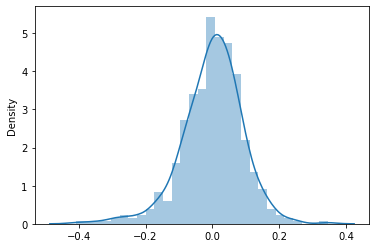

In [495]:
res=y_train-y_train_pred
sns.distplot(res)

### Step 5: Making predictions using final model

In [496]:
df_test

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Mon,Tues,...,Aug,Sep,Oct,Nov,Dec,summer,fall,winter,Clear,Misty
184,0,1,0,29.793347,33.27085,63.7917,5.459106,6043,0,0,...,0,0,0,0,0,0,1,0,0,1
535,1,0,1,32.082500,36.04875,59.2083,7.625404,6211,0,0,...,0,0,0,0,0,1,0,0,1,0
299,0,0,0,19.270000,22.85230,81.2917,13.250121,2659,0,0,...,0,0,1,0,0,0,0,1,0,1
221,0,0,1,31.433347,34.24915,42.4167,13.417286,4780,0,0,...,1,0,0,0,0,0,1,0,1,0
152,0,0,0,29.315000,32.19710,30.5000,19.583229,4968,0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,1,0,1,19.509153,23.45270,73.3750,11.666643,6606,0,0,...,0,0,0,0,1,0,0,1,1,0
127,0,0,1,21.661653,25.94665,63.1667,5.000712,4333,0,1,...,0,0,0,0,0,1,0,0,1,0
640,1,0,1,26.957500,29.95665,79.3750,4.458569,7572,0,0,...,0,0,1,0,0,0,0,1,0,1
72,0,0,1,13.333897,16.60000,49.6957,9.174042,2046,0,0,...,0,0,0,0,0,0,0,0,1,0


In [497]:
# create a list of numeric vars
num_vars= ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

# 2. Fit on data
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Mon,Tues,...,Aug,Sep,Oct,Nov,Dec,summer,fall,winter,Clear,Misty
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,1,0,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,0,0,0,0,1,0,0,1,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,1,0,0,0,0,1,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,1,0,0,0,0,0,1,0,1,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,0,0,0,0,0,1,0,0,1,0


In [498]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Mon,Tues,...,Aug,Sep,Oct,Nov,Dec,summer,fall,winter,Clear,Misty
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.558718,0.532847,0.638221,0.313293,0.522154,0.118182,0.122727,...,0.059091,0.086364,0.086364,0.072727,0.086364,0.263636,0.245455,0.236364,0.654545,0.318182
std,0.500809,0.187620,0.480828,0.233187,0.217401,0.148694,0.159584,0.219163,0.323559,0.328872,...,0.236333,0.281541,0.281541,0.260281,0.281541,0.441609,0.431338,0.425817,0.476601,0.466833
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [499]:
y_test = df_test.pop('cnt')
X_test = df_test

In [500]:
# add a constant

X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,yr,holiday,workingday,temp,atemp,hum,windspeed,Mon,Tues,...,Aug,Sep,Oct,Nov,Dec,summer,fall,winter,Clear,Misty
184,1.0,0,1,0,0.831783,0.769660,0.657364,0.084219,0,0,...,0,0,0,0,0,0,1,0,0,1
535,1.0,1,0,1,0.901354,0.842587,0.610133,0.153728,0,0,...,0,0,0,0,0,1,0,0,1,0
299,1.0,0,0,0,0.511964,0.496145,0.837699,0.334206,0,0,...,0,0,1,0,0,0,0,1,0,1
221,1.0,0,0,1,0.881625,0.795343,0.437098,0.339570,0,0,...,1,0,0,0,0,0,1,0,1,0
152,1.0,0,0,0,0.817246,0.741471,0.314298,0.537414,0,0,...,0,0,0,0,0,1,0,0,1,0


In [501]:
# removing columns from test data that were removed in train data
X_test_sm= X_test_sm.drop(['workingday','atemp','Mon','Tues','Wed','Thu','Fri','Sat','Feb','Jul','Apr','Jun','Nov','Dec','fall','May','Mar','hum','Oct'],axis=1)

In [502]:
X_test_sm

,const,yr,holiday,temp,windspeed,Aug,Sep,summer,winter,Clear,Misty
184,1.0,0,1,0.831783,0.084219,0,0,0,0,0,1
535,1.0,1,0,0.901354,0.153728,0,0,1,0,1,0
299,1.0,0,0,0.511964,0.334206,0,0,0,1,0,1
221,1.0,0,0,0.881625,0.339570,1,0,0,0,1,0
152,1.0,0,0,0.817246,0.537414,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
702,1.0,1,0,0.519232,0.283397,0,0,0,1,1,0
127,1.0,0,0,0.584649,0.069510,0,0,1,0,1,0
640,1.0,1,0,0.745598,0.052115,0,0,0,1,0,1
72,1.0,0,0,0.331557,0.203418,0,0,0,0,1,0


In [503]:
#predict
y_test_pred=lr_model.predict(X_test_sm)

In [504]:
#evaluate
from sklearn.metrics import r2_score
r2_score(y_true=y_test,y_pred=y_test_pred)

0.7935224695104378

Text(0, 0.5, 'y_pred')

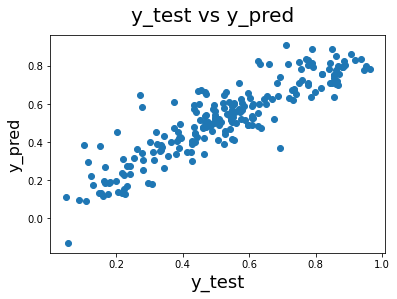

In [512]:
# Plotting y_test and y_pred to understand the spread and checking lineraity

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      